# Channel Properties

We will explore the X-Ray Telescope (XRT) instrument properties using XRTpy's `Channel` object.

In [1]:
import xrtpy

[X-Ray Filter Channel]: https://xrtpy.readthedocs.io/en/latest

Begin by defining a filter channel by its common abbreviation. In this example we will be exploring the titanium-on-polyimide filter. Reference the [X-Ray Filter Channel] for filter channel information.

In [2]:
filter = "Ti-poly"

Create an `xrtpy.response.Channel` object by inserting `filter` as an input.

In [3]:
channel = xrtpy.response.Channel(filter)

Now that we have created our `Channel` object. We can explore the XRT instruments and properties. Let's begin by looking into basic information about the XRT instrument.

In [4]:
print("Chosen filter:", channel.name)
print("Observatory:", channel.observatory)
print("Instrument:", channel.instrument)

Chosen filter: Ti-poly
Observatory: Hinode
Instrument: XRT


**Note: most instrument properties of the XRT are the same independent of filter.**

## Contents

1. [Charge-Coupled Device](#Charge-Coupled-Device-(CCD))
2. [Entrance Filter](#Entrance-Filter) 
3. [Focus Filter 1 and 2](#Focus-Filter)
4. [Geometry](#Geometry)
5. [Mirror 1 and 2](#Mirror)
6. [Instrument Plotting](#Instrument-Plotting)

## Charge-Coupled-Device (CCD)

We can look at `channel.ccd` to review properties of the XRT CCD camera.

In [5]:
print(channel.ccd.ccd_name)
print("Pixel size: ", channel.ccd.ccd_pixel_size)
print("Full well: ", channel.ccd.ccd_full_well)
print("Gain left: ", channel.ccd.ccd_gain_left)
print("Gain right: ", channel.ccd.ccd_gain_right)
print("eV per electron: ", channel.ccd.ccd_energy_per_electron)

Hinode/XRT Flight Model CCD
Pixel size:  13.5 micron
Full well:  222000.0 electron
Gain left:  58.79999923706055 electron
Gain right:  59.099998474121094 electron
eV per electron:  3.6500000953674316 eV / electron


## Entrance Filter

We can explore the XRT entrance filter properties using `channel.entrancefilter`. 

In [6]:
print(channel.entrancefilter.entrancefilter_name)
print("Material: ", channel.entrancefilter.entrancefilter_material)
print("Thickness: ", channel.entrancefilter.entrancefilter_thickness)
print("Density: ", channel.entrancefilter.entrancefilter_density)

Entrance filters
Material:  ['Al2O3' 'Al' 'Al2O3' 'polyimide']
Thickness:  [  75. 1492.    0. 2030.] Angstrom
Density:  [3.97  2.699 3.97  1.43 ] g / cm3


## Focus-Filter

[X-Ray Filter Channel]: https://xrtpy.readthedocs.io/en/latest

We are able to explore detailed information of the chosen XRT filter channel using `channel.filter_#`, where `#` is filter wheel 1 or 2. The XRT data is recorded through nine X-ray filters using two filter wheels. Since titanium-on-polyimide is in filter wheel 2, we will be exploring `channel.filter_2.` Reference the [X-Ray Filter Channel] for filter channel information.

In [7]:
print("Filter name: ", channel.filter_2.filter_name)
print("Filter material: ", channel.filter_2.filter_material)
print("Thickness: ", channel.filter_2.filter_thickness)
print("Density: ", channel.filter_2.filter_density)

Filter name:  Ti filter on polyimide
Filter material:  ['TiO2' 'Ti' 'TiO2' 'polyimide']
Thickness:  [  75. 2338.    0. 2522.] Angstrom
Density:  [4.26 4.54 4.26 1.43] g / cm3


## Geometry

We can explore geometry factors in the XRT using `channel.geometry`.

In [8]:
print(channel.geometry.geometry_name)
print("Focal length:", channel.geometry.geometry_focal_len)
print("Aperture Area:", channel.geometry.geometry_aperture_area)

Hinode/XRT Flight Model geometry
Focal length: 270.753 cm
Aperture Area: 2.28 cm2


## Mirror

XRTpy offers the ability to inspect the first and second surface mirror.
Mirror 1 and 2 are distinguish by the defining structure `channel_mirror_#`, where `#` is the first or second mirror surface. For this example we will explore a few XRT properties on the surface of mirror 1 using `channel_mirror_1`.

In [9]:
print(channel.mirror_1.mirror_name)
print("Material: ", channel.mirror_1.mirror_material)
print("Density: ", channel.mirror_1.mirror_density)
print("Graze_angle: ", channel.mirror_1.mirror_graze_angle)

Hinode/XRT Flight Model mirror
Material:  Zerodur
Density:  2.5299999713897705 g / cm3
Graze_angle:  0.9100000262260437 deg


## Instrument Plotting

### Plotting XRT properties - Transmittance

Define the XRT transmission in `channel` by referencing transmission.

In [10]:
transmission = channel.transmission

Next, define the XRT wavelength in `channel` by referencing wavelength.

In [11]:
wavelength = channel.wavelength

Create a plotting function that plots the `transmission` versus `wavelength`. 

In [12]:
import matplotlib.pyplot as plt


def plot_transmission(channel):
    plt.figure(figsize=(10, 6))

    plt.plot(wavelength, transmission, label=f"{channel.name}")

    plt.title("X-Ray Telescope", fontsize=15)
    plt.xlabel(r"$\lambda$ [Å]", fontsize=15)
    plt.ylabel("transmittance", fontsize=15)
    plt.legend(fontsize=20)
    plt.xlim(-5, 80)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.grid(color="lightgrey")
    plt.show()

Call the `plot_transmission` function to create the plot.

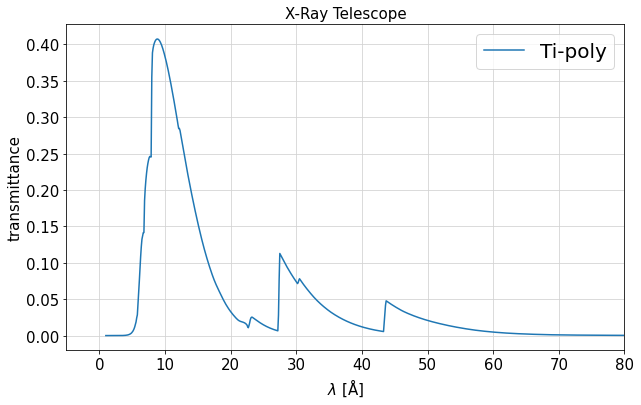

In [14]:
plot_transmission(channel)